In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=813c04ff37c64d0ecfcc178703642842409ab3a0f6b8970d4ae02f3cbadd6645
  Stored in directory: c:\users\devan\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


# Stock Prediction App using Machine Learning 

## Collecting the Stock Data using API's

### Fetching the data

In [2]:
import yfinance as yf

### for now we are using apple ka stock collection

In [4]:
ticker=input("Enter the Stock Name (for eg AAPL for Apple")
stock=yf.Ticker(ticker) #fetches the stock data

data=stock.history(period="1y", interval="1d") #fetching the data of past 1 year for daily intervals

print(data.head())




Enter the Stock Name (for eg AAPL for Apple AAPL


                                 Open        High         Low       Close  \
Date                                                                        
2024-04-01 00:00:00-04:00  170.385479  170.445194  168.683508  169.230927   
2024-04-02 00:00:00-04:00  168.285371  168.544144  167.439360  168.046494   
2024-04-03 00:00:00-04:00  167.996748  169.877865  167.787743  168.852707   
2024-04-04 00:00:00-04:00  169.489689  171.112033  168.026611  168.026611   
2024-04-05 00:00:00-04:00  168.792983  169.589226  168.155991  168.783035   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-01 00:00:00-04:00  46240500        0.0           0.0  
2024-04-02 00:00:00-04:00  49329500        0.0           0.0  
2024-04-03 00:00:00-04:00  47691700        0.0           0.0  
2024-04-04 00:00:00-04:00  53704400        0.0           0.0  
2024-04-05 00:00:00-04:00  42055200        0.0           0.0  


## Data preprocessing(that is cleaning and preparing the data for the analysis)

In [5]:
import pandas as pd

In [6]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

## check for null values

In [8]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,218.509596,220.780267,216.453103,218.749795,5.490763e+07,0.004000,0.0
std,22.661804,22.832206,22.346978,22.727468,3.044383e+07,0.031432,0.0
min,164.572913,165.617978,163.308889,164.224564,2.323470e+07,0.000000,0.0
25%,211.769035,215.050522,209.680285,212.550636,3.990165e+07,0.000000,0.0
50%,224.464611,226.366475,222.522789,224.504585,4.804335e+07,0.000000,0.0
75%,232.752745,234.570783,229.482695,232.820576,6.020300e+07,0.000000,0.0
max,257.906429,259.814335,257.347047,258.735504,3.186799e+08,0.250000,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-01 00:00:00-04:00 to 2025-03-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6 KB


In [10]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Moving on with SMA (Simple Moving Mean)

#why SMA

SMA is a technical indicator used to smooth out price data by creating an average price over a specific period. It helps in:
✅ Identifying trends
✅ Reducing noise in price fluctuations
✅ Making stock predictions more stable



Why Do We Use SMA?

📌 Trend Analysis: Helps identify whether the stock is in an uptrend, downtrend, or sideways movement.

📌 Smooth Price Data: Reduces short-term volatility, making trends clearer.

📌 Support & Resistance Levels: Many traders use SMA lines to spot support (price floors) and resistance (price ceilings).

Definition: Support is a price level where a stock tends to stop falling and start rising again. It's like a floor that the stock price doesn't usually fall below.

Example: Imagine a stock XYZ. Over time, it has been observed that whenever the price of XYZ drops to $120, many people start buying it because they think it's a good deal. This increased buying helps the price to rise again. So, $120 is a support level for XYZ.


What It Means: If you're a trader, you might consider buying the stock when it reaches $120 because it's likely to go up from there.

Resistance (Price Ceiling)
Definition: Resistance is a price level where a stock tends to stop rising and start falling again. It's like a ceiling that the stock price doesn't usually rise above.

Example: Consider another stock ABC. Whenever the price of ABC reaches
$160, many people start selling it because they think it's overvalued. 
This increased selling causes the price to drop.
So, $160 is a resistance level for ABC.

What It Means: If you're a trader,
you might consider selling the stock when it reaches $160
because it's likely to go down from there.

## Creating an SMA for 10 and 50 days 

In [11]:
data["SMA_10"]=data["Close"].rolling(window=10).mean()

In [12]:
data["SMA_50"]=data["Close"].rolling(window=50).mean()

## Now we will Be Creating a Visualization to compare the SMA's

In [13]:
import matplotlib.pyplot as plt


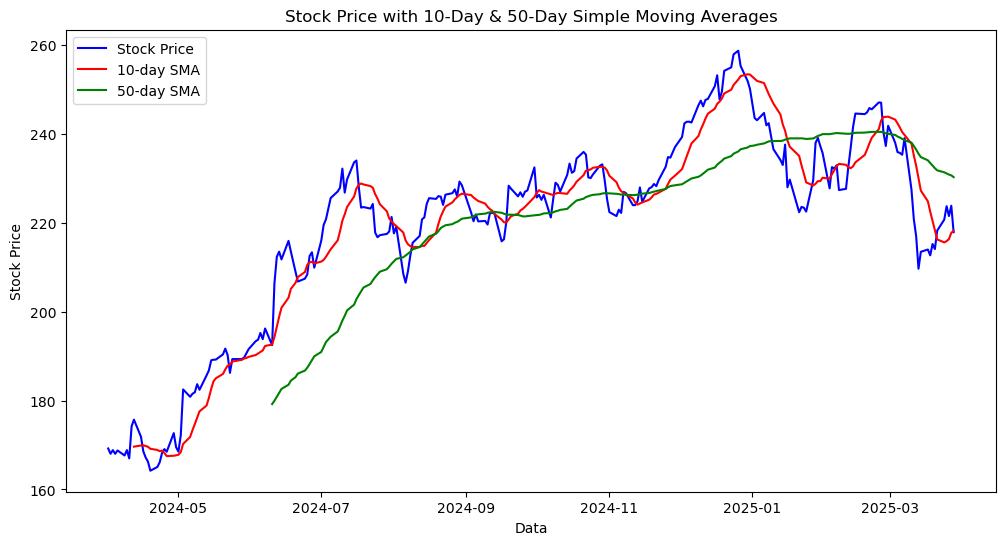

In [14]:
plt.figure(figsize=(12,6))

# Ploting of the clossing price
plt.plot(data.index, data["Close"],label="Stock Price", color="blue")

# Plot SMA for the 10 days 
plt.plot(data.index, data["SMA_10"], label="10-day SMA", color="red")

# Plot for 50 days
plt.plot(data.index, data["SMA_50"], label="50-day SMA", color="green")

plt.xlabel("Data")
plt.ylabel("Stock Price")
plt.title("Stock Price with 10-Day & 50-Day Simple Moving Averages")
plt.legend()
plt.show()

## Pre-liminary Analysis

✅ Short-Term vs. Long-Term Trend Understanding → You correctly identified that the SMA_10 (red line) shows short-term fluctuations, while SMA_50 (blue line) gives a smoother, long-term trend.

✅ Identifying Trend Reversals → Your reasoning about why the dip happened is great. The SMA_50 declining after an upward trend signals that the stock was growing before but has lost momentum.

✅ Cause-Effect Thinking → You figured out that the SMA_10 dropping first explains why SMA_50 started falling later—this is exactly how traders spot early warning signs.



## now lets work on support & resistance Detection

📌 If SMA_10 crosses above SMA_50, it’s a bullish signal (Golden Cross) → Uptrend is forming.

📌 If SMA_10 crosses below SMA_50, it’s a bearish signal (Death Cross) → Downtrend is forming.

👉 Analysis:

Check past occurrences of SMA_10 crossing SMA_50 and what happened afterward.

Plot vertical lines where the crossover happened to mark important trend shifts.



## Starting With crossover Analysis

📌 Golden Cross → When SMA_10 crosses above SMA_50, signaling a bullish trend.

📌 Death Cross → When SMA_10 crosses below SMA_50, signaling a bearish trend.

Implementation Plan:
✅ Identify points where SMA_10 crosses SMA_50.


✅ Mark those points on the graph.


✅ Analyze if price trends followed the crossover signals.

In [15]:
import numpy as np

In [16]:
import yfinance as yf

In [17]:
# identify Golden Cross And Death Cross points
data["Crossover"]=np.where((data["SMA_10"] > data["SMA_50"]) & (data["SMA_10"].shift(1)<=data["SMA_50"].shift(1)), "Golden Cross",
                           np.where((data["SMA_10"] < data["SMA_50"]) & (data["SMA_10"].shift(1)>=data["SMA_50"].shift(1)), "Death Cross",np.nan))
                           

### Extraction of cross over-points 

In [18]:
golden_crosses = data[data["Crossover"] == "Golden Cross"]
death_crosses = data[data["Crossover"] == "Death Cross"]

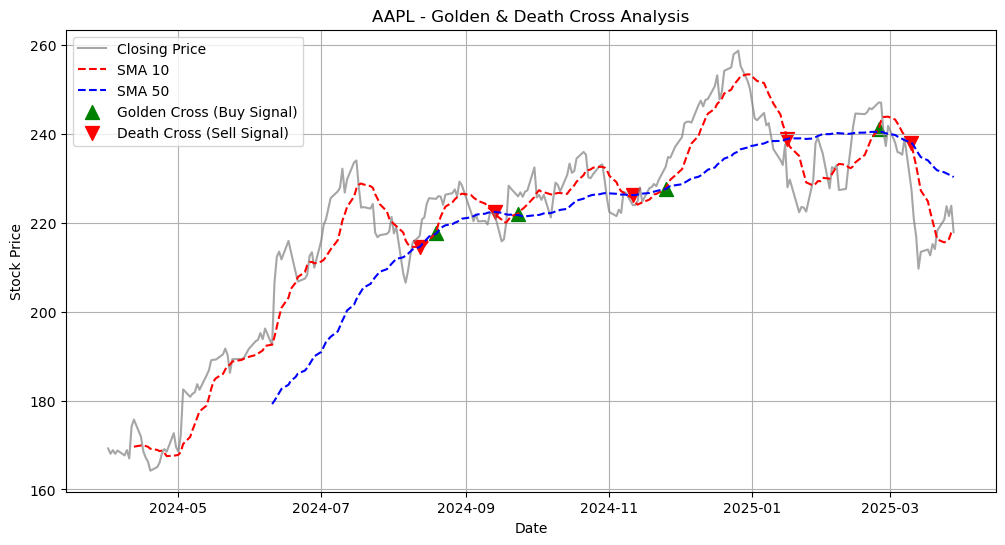

In [19]:
# Plot the stock price & moving averages
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="Closing Price", color='gray', alpha=0.7)
plt.plot(data.index, data["SMA_10"], label="SMA 10", color='red', linestyle="--")
plt.plot(data.index, data["SMA_50"], label="SMA 50", color='blue', linestyle="--")

# Mark Golden & Death Crosses
plt.scatter(golden_crosses.index, golden_crosses["SMA_10"], marker="^", color="green", label="Golden Cross (Buy Signal)", s=100)
plt.scatter(death_crosses.index, death_crosses["SMA_50"], marker="v", color="red", label="Death Cross (Sell Signal)", s=100)

plt.title(f"{ticker} - Golden & Death Cross Analysis")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Feature Engineering

In [20]:
# creating lag features that means getting data in intervals and delay to get dependency of future aspect in the model
data["lag_1"]=data["Close"].shift(1)
data["lag_2"]=data["Close"].shift(2)
data["lag_3"]=data["Close"].shift(3)

In [21]:
data["SMA_10"]=data["Close"].rolling(window=10).mean()

In [22]:
data["SMA_50"]=data["Close"].rolling(window=10).mean()

In [23]:
data["SMA_100"]=data["Close"].rolling(window=100).mean()

In [24]:
data['Rolling_Std'] = data['Close'].rolling(window=10).std()

NOW TO SHOW THE PRICE DIFFERENCE OF EACH DAY TO SHOW THE DAILY PRICE CHANGES

In [25]:
data["price_diff"]=data["Close"] - data["Close"].shift(1)

Percentage Change: Compute the Percentage Change between consecutive closing prices to measure daily returns.

In [26]:
data['Pct_Change'] = data['Close'].pct_change()

Moving Average Convergence Divergence (MACD): This is a technical indicator used to identify changes in the strength, direction, momentum, and duration of a trend in a stock’s price.

In [27]:
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()


RSI (Relative Strength Index): A momentum oscillator that measures the speed and change of price movements. It's often used to identify overbought or oversold conditions.

In [28]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))


VWAP (Volume-Weighted Average Price): This indicator provides a benchmark for the average price a stock has traded at throughout the day, based on both volume and price.

In [29]:
data['VWAP'] = (data['Volume'] * data['Close']).cumsum() / data['Volume'].cumsum()


In [30]:
data["MACD"].isnull().sum()

0

In [50]:
data["SMA_10"]=data["SMA_10"].fillna(data["SMA_10"].mean())

In [51]:
data["SMA_50"].isnull().sum()

0

In [33]:
data["SMA_100"].tail()

Date
2025-03-24 00:00:00-04:00    234.857403
2025-03-25 00:00:00-04:00    234.766028
2025-03-26 00:00:00-04:00    234.649760
2025-03-27 00:00:00-04:00    234.592313
2025-03-28 00:00:00-04:00    234.517174
Name: SMA_100, dtype: float64

In [52]:
df = pd.DataFrame(data)


In [53]:
print(df.info())  
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-01 00:00:00-04:00 to 2025-03-28 00:00:00-04:00
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
 7   SMA_10        250 non-null    float64
 8   SMA_50        250 non-null    float64
 9   Crossover     250 non-null    object 
 10  lag_1         250 non-null    float64
 11  lag_2         250 non-null    float64
 12  lag_3         250 non-null    float64
 13  SMA_100       250 non-null    float64
 14  Rolling_Std   250 non-null    float64
 15  price_diff    249 non-null    float64
 16  Pct_Change    250 non-null    float64
 17  EMA_12        250 non-nu

In [54]:
df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1, inplace=True)


In [85]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-01 00:00:00-04:00 to 2025-03-28 00:00:00-04:00
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        250 non-null    float64
 1   SMA_10       250 non-null    float64
 2   SMA_50       250 non-null    float64
 3   Crossover    250 non-null    int32  
 4   lag_1        250 non-null    float64
 5   lag_2        250 non-null    float64
 6   lag_3        250 non-null    float64
 7   SMA_100      250 non-null    float64
 8   Rolling_Std  250 non-null    float64
 9   price_diff   250 non-null    float64
 10  Pct_Change   250 non-null    float64
 11  EMA_12       250 non-null    float64
 12  EMA_26       250 non-null    float64
 13  MACD         250 non-null    float64
 14  Signal_Line  250 non-null    float64
 15  RSI          250 non-null    float64
 16  VWAP         250 non-null    float64
dtypes: float64(16), int32(1)
memory usage: 34.2

In [72]:
df["price_diff"]=df["price_diff"].fillna(df["price_diff"].bfill())

In [86]:
df["SMA_50"].isnull().sum()

0

## StandardScaling the data for reducing noise and outliers detection(OPTIONAL!)

In [74]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extracting features (excluding 'Close' as we don't scale the target variable)
X = df.drop(columns=['Close', 'Crossover'])
y = df[['Close', 'Crossover']]  # or just df['Close'] if you only want Close

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
scaled_features = scaler.fit_transform(X)  # Using X instead of undefined 'features'

# Converting scaled features back into a DataFrame for readability
scaled_data = pd.DataFrame(scaled_features, columns=X.columns)

scaled_data.head()

,SMA_10,SMA_50,lag_1,lag_2,lag_3,SMA_100,Rolling_Std,price_diff,Pct_Change,EMA_12,EMA_26,MACD,Signal_Line,RSI,VWAP
0,0.0,0.0,-1.253057e-15,-1.253184e-15,0.000000,0.0,0.0,-0.409997,0.000000,-2.101225,-1.990494,-0.484242,-0.570320,-0.594649,-1.908383
1,0.0,0.0,-2.183339e+00,-1.253184e-15,0.000000,0.0,0.0,-0.409997,-0.525570,-2.109138,-1.994230,-0.512046,-0.576579,-0.594649,-1.947740
2,0.0,0.0,-2.235558e+00,-2.182654e+00,0.000000,0.0,0.0,0.183845,0.236592,-2.110448,-1.995147,-0.514587,-0.582159,-0.594649,-1.942744
3,0.0,0.0,-2.200014e+00,-2.234879e+00,-2.182221,0.0,0.0,-0.303099,-0.389469,-2.117075,-1.998601,-0.535624,-0.591358,-0.594649,-1.954514
4,0.0,0.0,-2.236435e+00,-2.199331e+00,-2.234448,0.0,0.0,0.168992,0.217484,-2.117629,-1.999414,-0.533764,-0.598299,-0.594649,-1.951471


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split first (before scaling)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Close', 'Crossover']),  # Features (X)
    df[['Close', 'Crossover']] ,  # Target (y) - adjust if needed
    test_size=0.2,
    random_state=42
)

# Scale only the training data and apply to test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Do NOT fit on test data!

# Convert back to DataFrame (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head(), X_test_scaled.head()


(     SMA_10    SMA_50     lag_1     lag_2     lag_3   SMA_100  Rolling_Std  \
 0  0.302144  0.302144  0.100453  0.329358  0.269035 -1.043732    -0.832452   
 1  1.057249  1.057249  1.231616  1.244994  1.194456  1.356646     1.160375   
 2  0.496933  0.496933 -0.095757  0.073257  0.377366  1.434567     3.405357   
 3  0.022221  0.022221  0.054094 -0.138963 -0.169320 -1.791047    -0.450217   
 4  0.316100  0.316100  0.372113  0.434156  0.450473 -0.852666    -0.911630   
 
    price_diff  Pct_Change    EMA_12    EMA_26      MACD  Signal_Line  \
 0    1.144508    1.112236  0.327488  0.353966 -0.231701    -0.186456   
 1    0.403802    0.336719  1.056734  0.980771  0.318148    -0.285848   
 2   -2.196429   -2.225924  0.472621  0.739562 -1.844764    -1.002285   
 3    2.346492    2.309122  0.166097  0.229606 -0.448207    -0.501527   
 4    1.047765    0.988827  0.409353  0.405971 -0.048735    -0.168418   
 
         RSI      VWAP  
 0  0.095742  0.367376  
 1  1.371391  1.097228  
 2 -2.018

In [76]:
X_train_scaled.head()

,SMA_10,SMA_50,lag_1,lag_2,lag_3,SMA_100,Rolling_Std,price_diff,Pct_Change,EMA_12,EMA_26,MACD,Signal_Line,RSI,VWAP
0,0.302144,0.302144,0.100453,0.329358,0.269035,-1.043732,-0.832452,1.144508,1.112236,0.327488,0.353966,-0.231701,-0.186456,0.095742,0.367376
1,1.057249,1.057249,1.231616,1.244994,1.194456,1.356646,1.160375,0.403802,0.336719,1.056734,0.980771,0.318148,-0.285848,1.371391,1.097228
2,0.496933,0.496933,-0.095757,0.073257,0.377366,1.434567,3.405357,-2.196429,-2.225924,0.472621,0.739562,-1.844764,-1.002285,-2.018629,1.151777
3,0.022221,0.022221,0.054094,-0.138963,-0.169320,-1.791047,-0.450217,2.346492,2.309122,0.166097,0.229606,-0.448207,-0.501527,-0.339719,0.200905
4,0.316100,0.316100,0.372113,0.434156,0.450473,-0.852666,-0.911630,1.047765,0.988827,0.409353,0.405971,-0.048735,-0.168418,0.028901,0.393426


# Model Selection and Training

RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare X_rf (features) and y_rf (target) without scaling and without the 'Date' column
X_rf = df.drop(columns=['Close']).values  # Features (excluding 'Close')
y_rf = df['Close'].values  # Target is the 'Close' price

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE (Mean Squared Error) and R-squared score for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) for Random Forest Regression (without scaling): {mse_rf:.2f}")
print(f"R-squared score for Random Forest Regression (without scaling): {r2_rf:.2f}")


Mean Squared Error (MSE) for Random Forest Regression (without scaling): 6.50
R-squared score for Random Forest Regression (without scaling): 0.99


In [92]:
# Initialize the Random Forest Classifier model for classification
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train_scaled, y_train_crossover)

# Predict on the test data
y_pred_crossover = classifier.predict(X_test_scaled)

# Calculate accuracy for the classification model
accuracy = accuracy_score(y_test_crossover, y_pred_crossover)
print(f"Accuracy for Crossover Prediction: {accuracy:.2f}")


Accuracy for Crossover Prediction: 0.96


# EDA COMPLETE

                                Close      SMA_10      SMA_50  Crossover  \
Date                                                                       
2024-04-01 00:00:00-04:00  169.230927  219.659847  219.659847          2   
2024-04-02 00:00:00-04:00  168.046494  219.659847  219.659847          2   
2024-04-03 00:00:00-04:00  168.852707  219.659847  219.659847          2   
2024-04-04 00:00:00-04:00  168.026611  219.659847  219.659847          2   
2024-04-05 00:00:00-04:00  168.783035  219.659847  219.659847          2   

                                lag_1       lag_2       lag_3     SMA_100  \
Date                                                                        
2024-04-01 00:00:00-04:00  218.753208  218.732656  218.721331  224.412594   
2024-04-02 00:00:00-04:00  169.230927  218.732656  218.721331  224.412594   
2024-04-03 00:00:00-04:00  168.046494  169.230927  218.721331  224.412594   
2024-04-04 00:00:00-04:00  168.852707  168.046494  169.230927  224.412594   
2024-

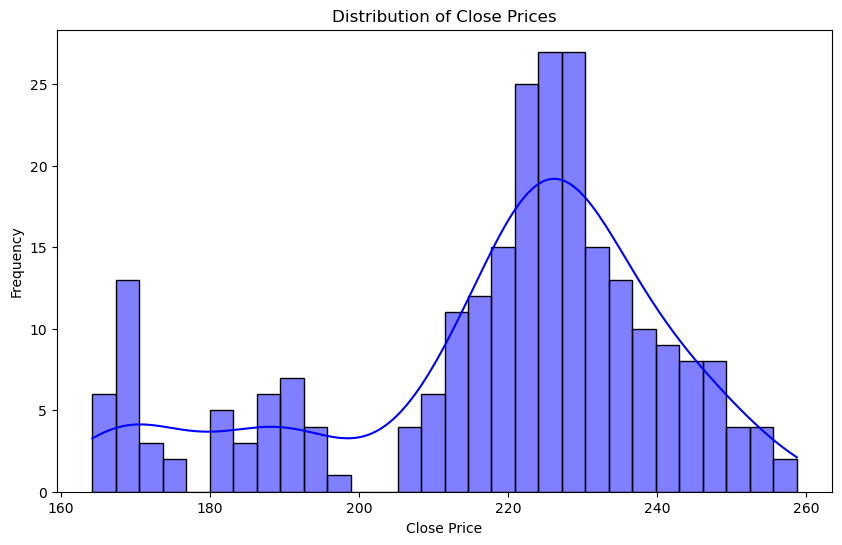

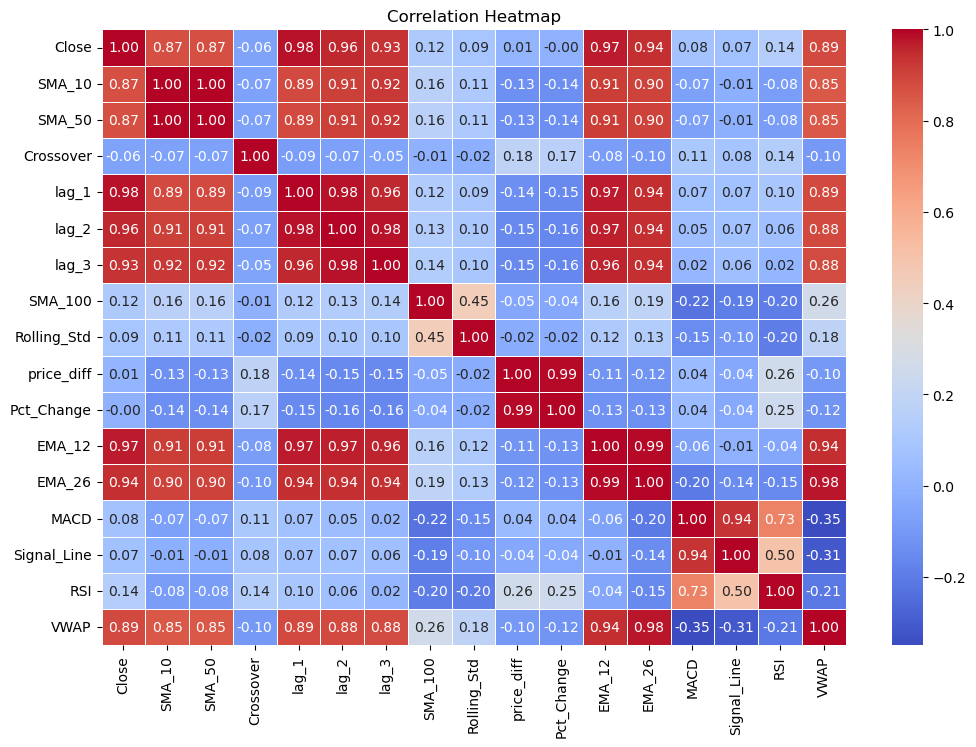

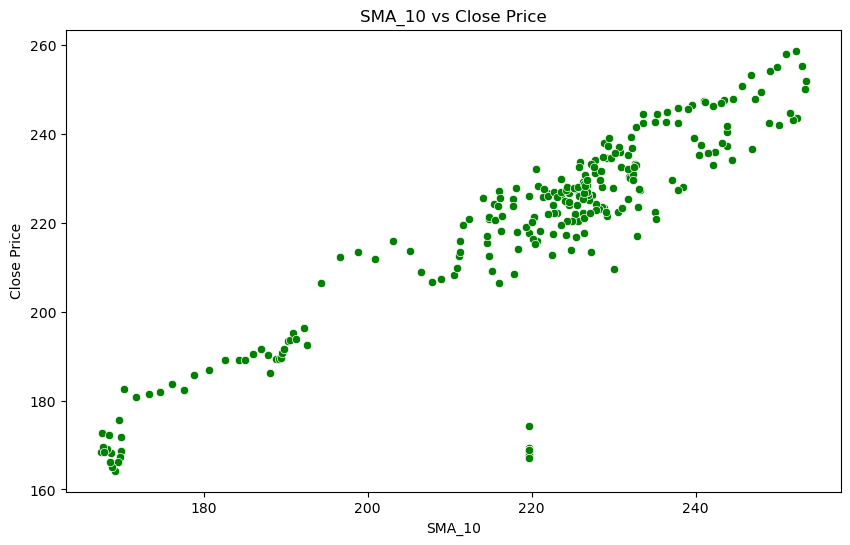

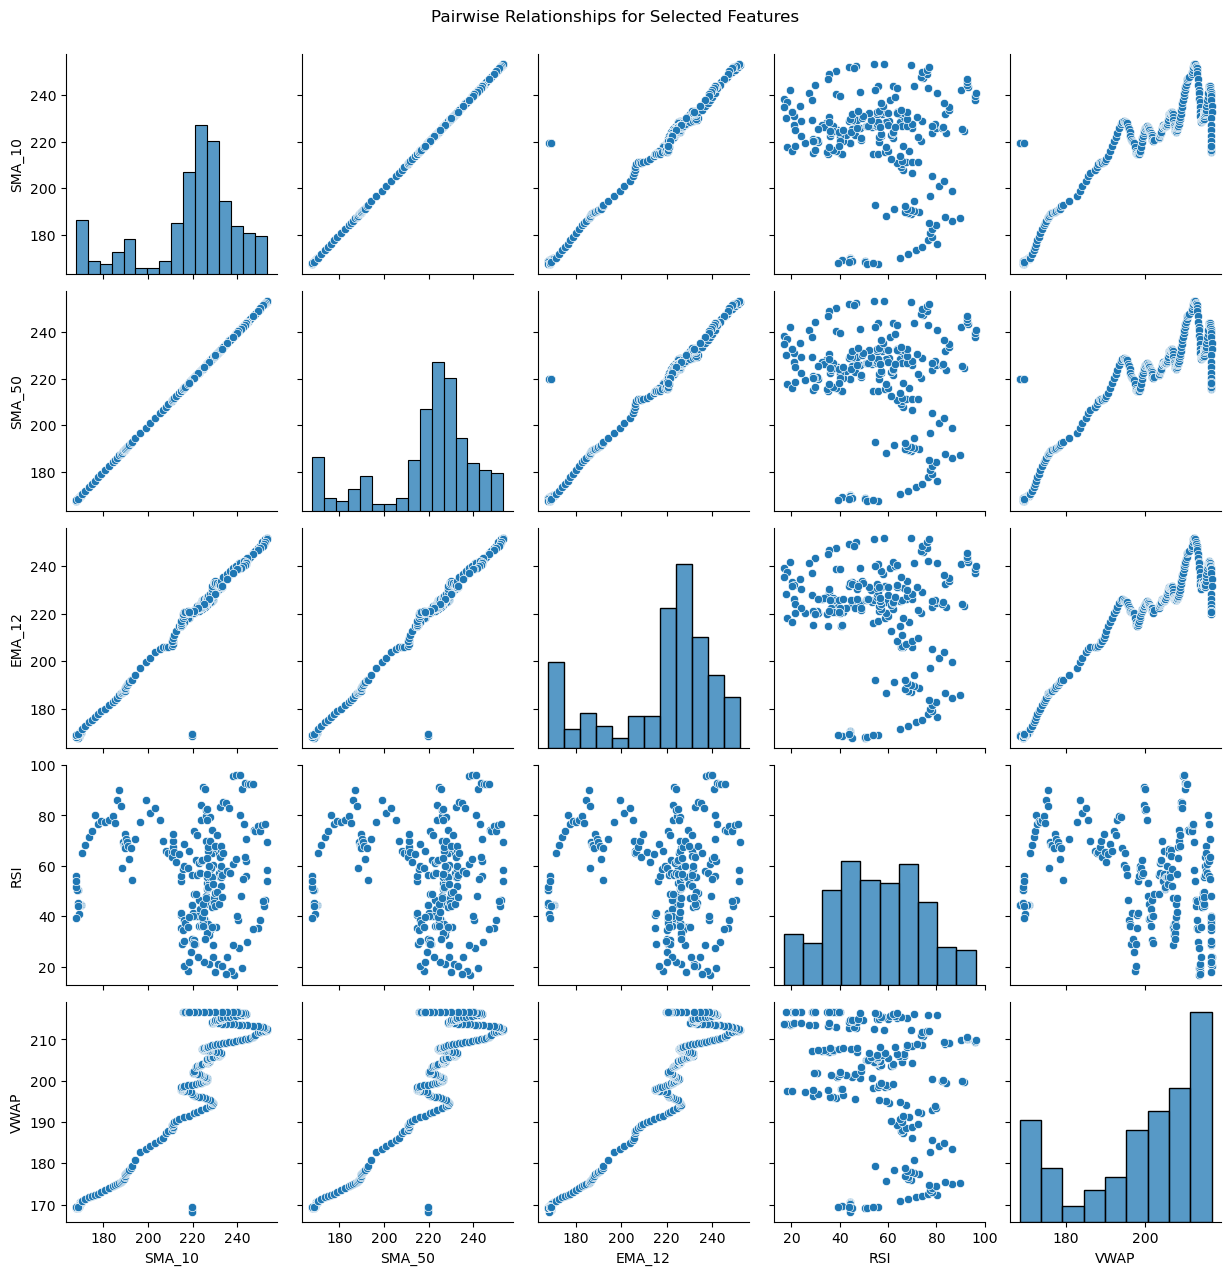

<Figure size 1200x800 with 0 Axes>

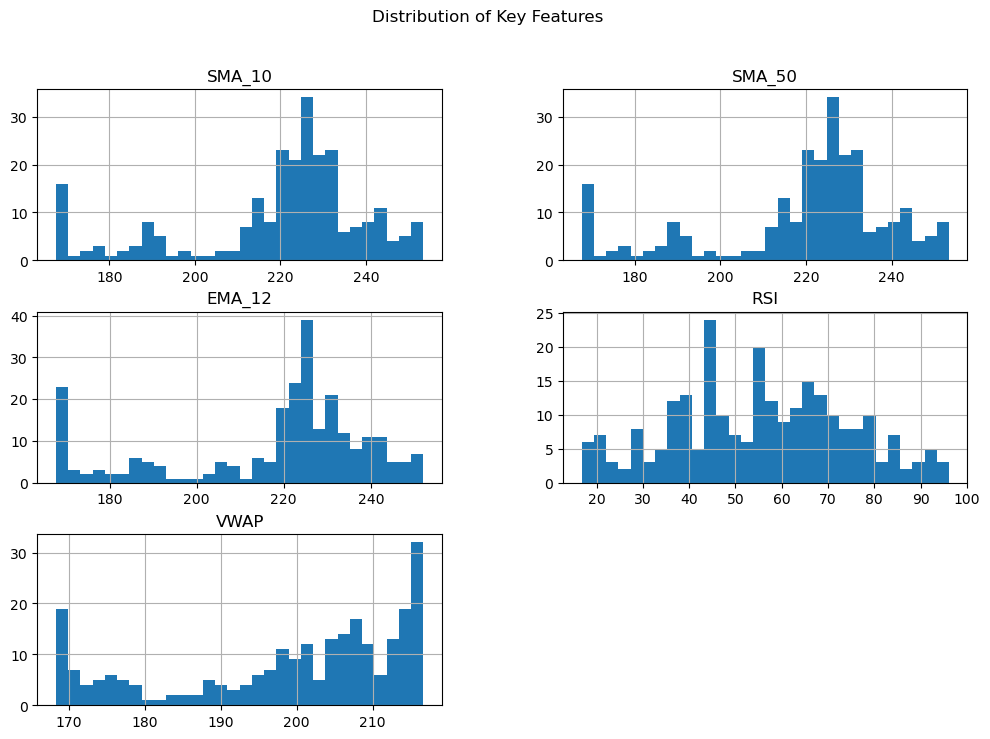

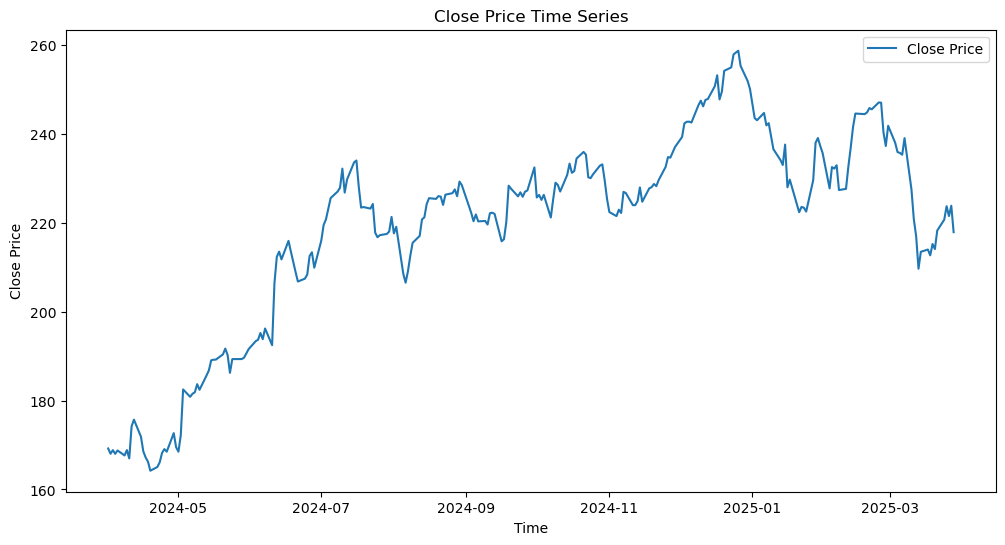

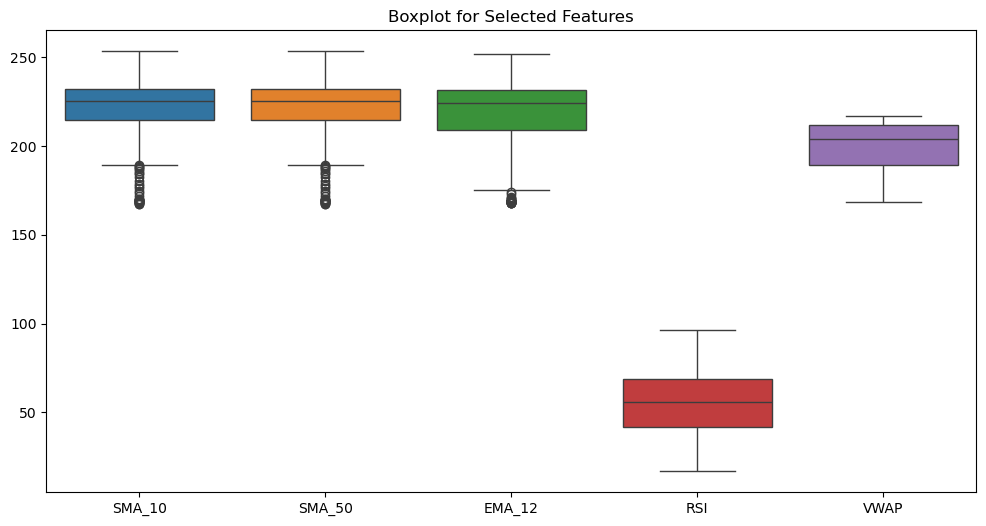

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Let's start by checking the first few rows of the dataset to understand its structure
print(df.head())

# Basic Data Overview
print(df.describe())  # Summary statistics for numerical columns
print(df.info())  # Info about data types and missing values

# 1. Plot Distribution of 'Close' Prices (Target Variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# 2. Check Correlation Heatmap (Features vs Target and Feature-to-Feature Correlation)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Scatter Plot to Check Relationship Between Features and Target (Close)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SMA_10'], y=df['Close'], color='green')
plt.title('SMA_10 vs Close Price')
plt.xlabel('SMA_10')
plt.ylabel('Close Price')
plt.show()

# 4. Plot Pairwise Relationships for Some Key Features (Scatterplot Matrix)
selected_features = ['SMA_10', 'SMA_50', 'EMA_12', 'RSI', 'VWAP']
sns.pairplot(df[selected_features])
plt.suptitle('Pairwise Relationships for Selected Features', y=1.02)
plt.show()

# 5. Plot the Distribution of Important Features
features = ['SMA_10', 'SMA_50', 'EMA_12', 'RSI', 'VWAP']
plt.figure(figsize=(12, 8))
df[features].hist(bins=30, figsize=(12, 8), layout=(3, 2))
plt.suptitle('Distribution of Key Features')
plt.show()

# 6. Visualizing Time-Series Data (Optional, If Time is Important)
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Time Series')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 7. Boxplots for Outliers in Numerical Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot for Selected Features')
plt.show()
